# Imports

In [1]:
import os

os.chdir("/Users/evanrootness/DS_Projects/EtsyDSProject")
pwd = os.getcwd()
print(pwd)

/Users/evanrootness/DS_Projects/EtsyDSProject


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.optimize as opt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys
import re

In [3]:
data = pd.read_csv(pwd + '/data/cleaned_data.csv', )
# data

In [4]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Train Test Split

In [5]:
x_train, xtest, y_train, ytest = train_test_split(data.iloc[:, 5:], 
                                                  data.iloc[:, 1], test_size=0.3, random_state=0)

# SVR Model

In [62]:
# Create SVR model
svr_model = SVR()

# Train the model
svr_model.fit(x_train, y_train)

y_pred = svr_model.predict(xtest)

# Calculate regression metrics
mae = mean_absolute_error(ytest, y_pred)
medae = median_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = mean_squared_error(ytest, y_pred, squared=False)  # RMSE
score = svr_model.score(xtest, ytest)

print('Mean absolute error:', round(mae, 2), 'Median absolute error:', round(medae, 2), 'Mean squared error:', round(mse, 2), 'Root mean squared error:', round(rmse, 2), 'score:', round(score, 2))

# Print the feature importances

# Get the indices of support vectors
# support_vector_indices = svr_model.support_

# Get the coefficients associated with support vectors
coefficients = svr_model.dual_coef_.flatten()
# feature_importances = svr_model.coef_
feature_names = x_train.columns

for name, importance in zip(feature_names, coefficients):
    print(f"{name}: {importance}")

Mean absolute error: 87.79 Median absolute error: 11.26 Mean squared error: 101091.73 Root mean squared error: 317.95 score: -0.05
Art: 1.0
Print: 1.0
Wall: -1.0
art: -1.0
Decor: 1.0
print: 1.0
Gift: -1.0
Printable: 1.0
Poster: -1.0
Abstract: -1.0
wall: 1.0
decor: -1.0
Watercolor: 1.0
of: -1.0
Nursery: -1.0
Digital: 1.0
Prints: -1.0
Large: 1.0
Modern: 1.0
Download: 1.0


(0.0, 100.0)

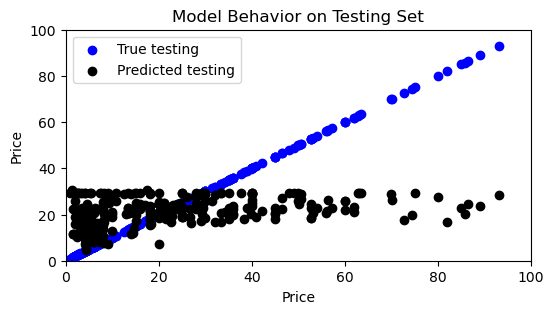

In [7]:
col_name = 'Price'

fig = plt.figure(figsize=(6,3))
plt.scatter(ytest, ytest, color = "blue")
plt.scatter(ytest, model.predict(xtest), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Price')
plt.title("Model Behavior on Testing Set")
plt.xlim(0, 100)
plt.ylim(0, 100)

In [54]:
def svr_iterations():
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']

    for kern in kernels:
        model = SVR(kernel=kern)
        model.fit(x_train, y_train)
        y_pred = model.predict(xtest)
        
        mae = mean_absolute_error(ytest, y_pred)
        rmse = mean_squared_error(ytest, y_pred, squared=False)
        score = model.score(xtest, ytest)
        
        print('Kernel:', kern, 'Mean absolute error:', round(mae, 2), 'Root mean squared error:', round(rmse, 2), 'model score:', round(score, 2))
svr_iterations()

Kernel: linear Mean absolute error: 87.56 Root mean squared error: 317.78 model score: -0.05
Kernel: poly Mean absolute error: 88.03 Root mean squared error: 318.83 model score: -0.05
Kernel: rbf Mean absolute error: 87.79 Root mean squared error: 317.95 model score: -0.05
Kernel: sigmoid Mean absolute error: 88.38 Root mean squared error: 320.05 model score: -0.06


# Linear Regression Model

In [53]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(xtest)

mae = mean_absolute_error(ytest, y_pred)
medae = median_absolute_error(ytest, y_pred)
rmse = mean_squared_error(ytest, y_pred, squared=False)
r2 = r2_score(ytest, y_pred)
score = model.score(xtest, ytest)

print('Mean absolute error:', round(mae, 2), 'Median absolute error:', round(medae, 2), 'Mean squared error:', round(mse, 2), 'Root mean squared error:', round(rmse, 2), 'score:', round(score, 2))

cv = cross_val_score(linear_model, x_train, y_train, cv=6)
# print(cv)
print('cv mean:', cv.mean())

# Print the feature importances
feature_importances = linear_model.coef_
feature_names = x_train.columns

for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance}")

Mean absolute error: 143.75 Median absolute error: 94.11 Mean squared error: 101091.73 Root mean squared error: 272.33 score: -0.05
cv mean: 0.0628651276773693
Art: -134.16723789480974
Print: -105.8610859737856
Wall: 254.64905373090798
art: -43.56123541447332
Decor: -52.41664161930982
print: -64.48908709550608
Gift: -54.444863977296855
Printable: -27.45391562665958
Poster: -47.30109083805772
Abstract: -38.343632709162804
wall: 22.69935131383367
decor: -42.802665734203146
Watercolor: -45.05347500874077
of: 16.943225764542824
Nursery: 10.418219093014688
Digital: -71.56090385433112
Prints: -50.54324032594378
Large: -3.6209746906231484
Modern: -0.3748988370102807
Download: -8.177257937846104


(0.0, 500.0)

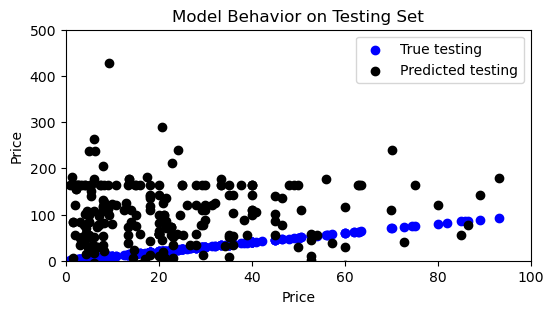

In [11]:
col_name = 'Price'

fig = plt.figure(figsize=(6,3))
plt.scatter(ytest, ytest, color = "blue")
plt.scatter(ytest, linear_model.predict(xtest), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Price')
plt.title("Model Behavior on Testing Set")
plt.xlim(0, 100)
plt.ylim(0, 500)

# Decision Tree Regressor Model

In [51]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(xtest)

mae = mean_absolute_error(ytest, y_pred)
medae = median_absolute_error(ytest, y_pred)
rmse = mean_squared_error(ytest, y_pred, squared=False)
r2 = r2_score(ytest, y_pred)
score = dt_model.score(xtest, ytest)

print('Mean absolute error:', round(mae, 2), 'Median absolute error:', round(medae, 2), 'Mean squared error:', round(mse, 2), 'Root mean squared error:', round(rmse, 2), 'score:', round(score, 2))

# cv = cross_val_score(dt_model, x_train, y_train, cv=6)
# print(cv)
# print(cv.mean())


# Print the feature importances
feature_importances = dt_model.feature_importances_
feature_names = x_train.columns

for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance}")

Mean absolute error: 63.61 Median absolute error: 14.51 Mean squared error: 101091.73 Root mean squared error: 162.58 score: 0.73
Art: 0.39208665460248787
Print: 0.06558863167534196
Wall: 0.33063239130645017
art: 0.09190983469367923
Decor: 0.06037421656844077
print: 0.005676080147169893
Gift: 0.0015401950676233998
Printable: 0.0011659432952581344
Poster: 0.004146793910475997
Abstract: 0.0029922371948009705
wall: 0.005872802694179298
decor: 0.0029227733454814243
Watercolor: 0.002669697375833667
of: 0.007826781542571524
Nursery: 0.00015655914389769412
Digital: 0.0017666685763265922
Prints: 0.0002900326531358782
Large: 0.016060142542960364
Modern: 0.003831798368606789
Download: 0.0024897652952783457


(0.0, 500.0)

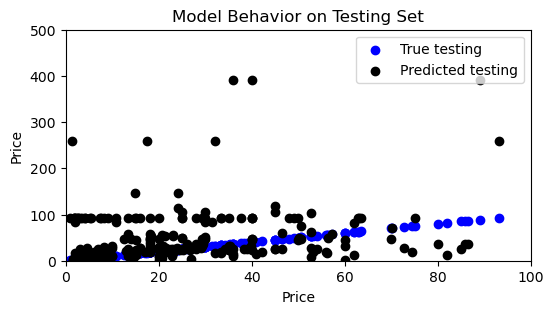

In [13]:
col_name = 'Price'

fig = plt.figure(figsize=(6,3))
plt.scatter(ytest, ytest, color = "blue")
plt.scatter(ytest, dt_model.predict(xtest), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Price')
plt.title("Model Behavior on Testing Set")
plt.xlim(0, 100)
plt.ylim(0, 500)

# Random Forest Regressor Model

Mean absolute error: 61.73 Median absolute error: 15.37 Mean squared error: 101091.73 Root mean squared error: 156.48 score: 0.75
Art: 0.3875490974219586
Print: 0.06576910934619096
Wall: 0.3203129635623794
art: 0.08748398925476784
Decor: 0.0583681733122881
print: 0.013878492843070496
Gift: 0.002717687107971914
Printable: 0.0012939095113757284
Poster: 0.0036347683897982267
Abstract: 0.0034333378881415506
wall: 0.012539109151796672
decor: 0.00714217121224187
Watercolor: 0.002332299378255618
of: 0.0077620685692262655
Nursery: 0.0034648951618417253
Digital: 0.0022860155840899537
Prints: 0.0005189307858185172
Large: 0.011532977295583478
Modern: 0.0057139151412507255
Download: 0.002266089081952229


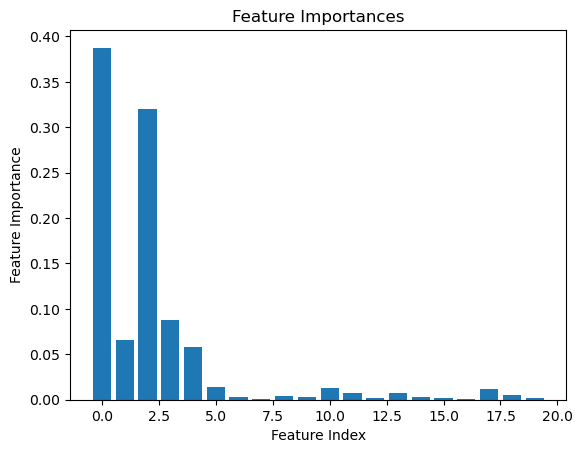

In [64]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(xtest)

mae = mean_absolute_error(ytest, y_pred)
medae = median_absolute_error(ytest, y_pred)
rmse = mean_squared_error(ytest, y_pred, squared=False)
r2 = r2_score(ytest, y_pred)
score = rf_model.score(xtest, ytest)

print('Mean absolute error:', round(mae, 2), 'Median absolute error:', round(medae, 2), 'Mean squared error:', round(mse, 2), 'Root mean squared error:', round(rmse, 2), 'score:', round(score, 2))

# cv = cross_val_score(rf_model, x_train, y_train, cv=6)
# print(cv)
# print(cv.mean())

# Print the feature importances
feature_importances = rf_model.feature_importances_
feature_names = x_train.columns

for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance}")
    
# Plot feature importances
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.show()

(0.0, 500.0)

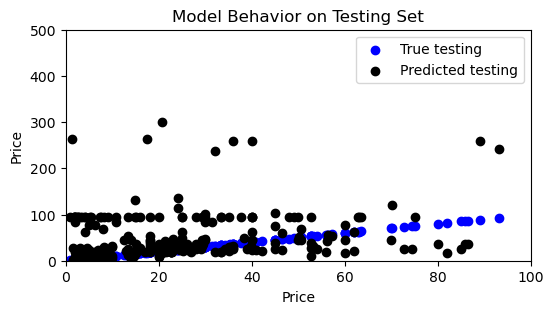

In [15]:
col_name = 'Price'

fig = plt.figure(figsize=(6,3))
plt.scatter(ytest, ytest, color = "blue")
plt.scatter(ytest, rf_model.predict(xtest), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Price')
plt.title("Model Behavior on Testing Set")
plt.xlim(0, 100)
plt.ylim(0, 500)

# Grid Search

## Grid search SVR

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']}
svr_model = SVR()
clf = GridSearchCV(svr_model, param_grid, cv=4, scoring='r2', verbose=3)
clf.fit(x_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV 1/4] END ...............C=1, kernel=linear;, score=-0.044 total time=   0.0s
[CV 2/4] END ...............C=1, kernel=linear;, score=-0.029 total time=   0.0s
[CV 3/4] END ...............C=1, kernel=linear;, score=-0.022 total time=   0.0s
[CV 4/4] END ...............C=1, kernel=linear;, score=-0.058 total time=   0.0s
[CV 1/4] END ..................C=1, kernel=rbf;, score=-0.050 total time=   0.0s
[CV 2/4] END ..................C=1, kernel=rbf;, score=-0.033 total time=   0.0s
[CV 3/4] END ..................C=1, kernel=rbf;, score=-0.025 total time=   0.0s
[CV 4/4] END ..................C=1, kernel=rbf;, score=-0.061 total time=   0.0s
[CV 1/4] END ..............C=10, kernel=linear;, score=-0.040 total time=   0.0s
[CV 2/4] END ..............C=10, kernel=linear;, score=-0.025 total time=   0.0s
[CV 3/4] END ..............C=10, kernel=linear;, score=-0.020 total time=   0.0s
[CV 4/4] END ..............C=10, kernel=linear;, 

GridSearchCV(cv=4, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']},
             scoring='r2', verbose=3)

In [40]:
print(clf.best_params_)
print(clf.best_score_)

{'C': 1000, 'kernel': 'rbf'}
0.51688271273495


AttributeError: 'GridSearchCV' object has no attribute 'coef_'

In [ ]:
# Create SVR model
model = SVR()

# Train the model
model.fit(x_train, y_train)

y_pred = model.predict(xtest)

# Calculate regression metrics
mae = mean_absolute_error(ytest, y_pred)
medae = median_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = mean_squared_error(ytest, y_pred, squared=False)  # RMSE
score = model.score(xtest, ytest)

print('Mean absolute error:', round(mae, 2), 'Median absolute error:', round(medae, 2), 'Mean squared error:', round(mse, 2), 'Root mean squared error:', round(rmse, 2), 'score:', round(score, 2))

## Grid Search Multiple Models

In [41]:
from sklearn.svm import SVC
from operator import itemgetter
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import operator

In [ ]:
# pipeline parameters
parameters = \
    [ \
        {
            'clf': [SVR()],
            'C': [1, 10, 100, 1000]
            'kernel': ['linear', 'rbf']
            # 'tf-idf__stop_words': ['english', None],
            # 'clf__alpha': [0.001, 0.1, 1, 10, 100]
        },

        {
            'clf': [LinearRegression()],
            'tf-idf__stop_words': ['english', None],
            'clf__C': [0.001, 0.1, 1, 10, 100, 10e5],
            'clf__kernel': ['linear', 'rbf'],
            'clf__class_weight': ['balanced'],
            'clf__probability': [True]
        },

        {
            'clf': [DecisionTreeRegressor()],
            
            
            'tf-idf__stop_words': ['english', None],
            'clf__criterion': ['gini','entropy'],
            'clf__splitter': ['best','random'],
            'clf__class_weight':['balanced', None]
        }
    ]

#evaluating multiple classifiers
#based on pipeline parameters
#-------------------------------
result=[]

for params in parameters:

    #classifier
    clf = params['clf'][0]

    #getting arguments by
    #popping out classifier
    params.pop('clf')

    #pipeline
    steps = [('tf-idf', TfidfVectorizer()), ('clf',clf)]

    #cross validation using
    #Grid Search
    grid = GridSearchCV(Pipeline(steps), param_grid=params, cv=3)
    grid.fit(features, labels)

    #storing result
    result.append\
    (
        {
            'grid': grid,
            'classifier': grid.best_estimator_,
            'best score': grid.best_score_,
            'best params': grid.best_params_,
            'cv': grid.cv
        }
    )

#sorting result by best score
result = sorted(result, key=operator.itemgetter('best score'),reverse=True)

#saving best classifier
grid = result[0]['grid']
joblib.dump(grid, 'classifier.pickle')